# ATTN: This script uses Google translate to detect job description language. Google translate will limit requests and take a very long time. Only run this script if redoing language detection.

## Read from scrapped data

In [1]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [2]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


Using MPS


0it [00:00, ?it/s]

<Figure size 640x480 with 0 Axes>

#### Read paths

In [3]:
glob_paths = list(set(glob.glob(f'{scraped_data}Coding Material/*Folder/*/Job ID -*- Codebook (Automating Equity).xlsx')))


In [4]:
# 244 xlsx files
len(glob_paths)


244

#### Use paths to open files, fix keywords, and drop unneeded columns

In [5]:
%%time
# columns
cols=['Sector', 
      'Sector Code', 
      'Gender', 
      'Age', 
      'Language', 
      'Dutch Requirement in Sentence', 
      'English Requirement in Sentence', 
      'Gender_Female', 
      'Gender_Mixed', 
      'Gender_Male', 
      'Age_Older', 
      'Age_Mixed', 
      'Age_Younger', 
      'Gender_Num', 
      'Age_Num', 
      '% Female', 
      '% Male', 
      '% Older', 
      '% Younger']

# Fix list catches all incorrect/faculty keyword search terms
fix_list = []

# Appended data catches all the fixed and cleaned dfs
appended_data = []

for glob_path in glob_paths:

    try:
        df_temp = pd.read_excel(glob_path)
    except ValueError:
        fix_list.append(glob_path)

    if len(df_temp) > 0 and isinstance(df_temp, pd.DataFrame):
        df_temp = df_temp
        df_temp = df_temp.drop(columns=cols, axis='columns', errors='ignore')
        df_temp = df_temp.drop(
        df_temp.columns[
                df_temp.columns.str.contains(
                    'unnamed|index|level', regex=True, case=False, flags=re.I
                )
            ],
            axis='columns',
            errors='ignore',
        )

        appended_data.append(df_temp)

# Concatonate list of dfs into one large df_manual
df_manual = pd.concat(appended_data, axis='index')

# Save df_manual to file
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_raw.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_raw.csv')


CPU times: user 5.98 s, sys: 114 ms, total: 6.1 s
Wall time: 6.56 s


In [6]:
# If we couldn't fix some keywords, we add them to list fix_list and write to file
if len(fix_list) != 0:
    print('Some keywords to fix!')
    with open(f'{data_dir}fix_list.txt', 'w') as f:
        json.dump(fix_list, f)


In [7]:
# List of dfs, len = 244
len(appended_data)


244

In [8]:
# Concatonate list of dfs into one large df_manual
df_manual = pd.concat(appended_data, axis='index')


In [9]:
# len = 12400
len(df_manual)


12400

In [10]:
# Save df_manual to file
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_raw.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_raw.csv')


## Drop duplicated and missing data

### START HERE IF SOURCING FROM df_manual_RAW
### PLEASE SET CORRECT DIRECTORY PATHS BELOW

In [11]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [12]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [13]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_raw.pkl')


In [14]:
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12400 entries, 0 to 71
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job ID           12400 non-null  object 
 1   Sentence         12396 non-null  object 
 2   Warmth           12398 non-null  float64
 3   Competence       12400 non-null  int64  
 4   Task_Mentioned   12398 non-null  float64
 5   Task_Warmth      12398 non-null  float64
 6   Task_Competence  12398 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 775.0+ KB
Warmth:
--------------------
Warmth Counts:
0.00    9572
1.00    2826
Name: Warmth, dtype: int64
--------------------
Warmth Percentages:
0.00   77.20
1.00   22.80
Name: Warmth, dtype: float64
--------------------
Min Warmth value: 0.0
Max Warmth value: 1.0
--------------------
Warmth Mean: 0.23
--------------------
Warmth Standard Deviation: 0.42
Competence:
--------------------
Competence Counts:
0   

In [15]:
# len = 12400
len(df_manual)


12400

In [16]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12400 entries, 0 to 71
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job ID           12400 non-null  object 
 1   Sentence         12396 non-null  object 
 2   Warmth           12398 non-null  float64
 3   Competence       12400 non-null  int64  
 4   Task_Mentioned   12398 non-null  float64
 5   Task_Warmth      12398 non-null  float64
 6   Task_Competence  12398 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 775.0+ KB


In [17]:
# Clean columns
df_manual.columns = df_manual.columns.to_series().progress_apply(lambda x: str(x).strip())

progress-bar:   0%|          | 0/7 [00:00<?, ?it/s]

In [18]:
df_manual['Sentence'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Sentence, dtype: object

In [19]:
# Remove columns 'Task_Mentioned', 'Task_Warmth', 'Task_Competence'
df_manual = df_manual.drop(
    columns=['Task_Mentioned', 'Task_Warmth', 'Task_Competence'],
    axis='columns',
    errors='ignore'
)

In [20]:
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12400 entries, 0 to 71
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job ID      12400 non-null  object 
 1   Sentence    12396 non-null  object 
 2   Warmth      12398 non-null  float64
 3   Competence  12400 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 484.4+ KB


In [21]:
# Missing values: Sentence = 4, Warmth = 2, Competence = 0
df_manual.isna().sum()

Job ID        0
Sentence      4
Warmth        2
Competence    0
dtype: int64

In [22]:
# Drop NA and non ut8 characters
df_manual = df_manual.dropna(axis='index', how='all')
df_manual = df_manual.dropna(axis='columns', how='all')
df_manual = df_manual.dropna(
    subset = ['Sentence', 'Warmth', 'Competence'],
)
df_manual = df_manual.drop_duplicates(
    subset=['Job ID', 'Sentence', 'Warmth', 'Competence']
)
df_manual = df_manual.loc[df_manual['Sentence'].str.len() > 2]
df_manual['Sentence'] = df_manual['Sentence'].apply(lambda x: unicodedata.normalize('NFKD', x.encode('ascii', 'ignore').decode('utf-8', 'ignore')))
df_manual = df_manual.reset_index(drop=True)


In [23]:
# len=6966
len(df_manual)


6966

In [24]:
df_manual['Sentence'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Sentence, dtype: object

In [25]:
# No na values
df_manual.isna().sum()

Job ID        0
Sentence      0
Warmth        0
Competence    0
dtype: int64

In [26]:
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6966 entries, 0 to 6965
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job ID      6966 non-null   object 
 1   Sentence    6966 non-null   object 
 2   Warmth      6966 non-null   float64
 3   Competence  6966 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 217.8+ KB
Warmth:
--------------------
Warmth Counts:
0.00    5225
1.00    1741
Name: Warmth, dtype: int64
--------------------
Warmth Percentages:
0.00   75.00
1.00   25.00
Name: Warmth, dtype: float64
--------------------
Min Warmth value: 0.0
Max Warmth value: 1.0
--------------------
Warmth Mean: 0.25
--------------------
Warmth Standard Deviation: 0.43
Competence:
--------------------
Competence Counts:
0    3923
1    3043
Name: Competence, dtype: int64
--------------------
Competence Percentages:
0   56.30
1   43.70
Name: Competence, dtype: float64
--------------------
M

In [27]:
df_manual.columns

Index(['Job ID', 'Sentence', 'Warmth', 'Competence'], dtype='object')

In [28]:
df_manual['Sentence'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Sentence, dtype: object

In [29]:
# Convert Warmth and Competence to int
# Warmth 1 = 1741, Competence 1 = 3043
int_cols = [
    'Warmth',
    'Competence',
]

for col in int_cols:
    df_manual[col] = df_manual[col].astype(np.int64, errors='ignore')
    print(f'{col} converted to int.' if all(df_manual[col].progress_apply(lambda x: isinstance(x, int))) else f'{col} NOT converted to int.')
    print(f'{col} value counts:\n{df_manual[col].value_counts()}')


progress-bar:   0%|          | 0/6966 [00:00<?, ?it/s]

Warmth converted to int.
Warmth value counts:
0    5225
1    1741
Name: Warmth, dtype: int64


progress-bar:   0%|          | 0/6966 [00:00<?, ?it/s]

Competence converted to int.
Competence value counts:
0    3923
1    3043
Name: Competence, dtype: int64


In [30]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6966 entries, 0 to 6965
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Job ID      6966 non-null   object
 1   Sentence    6966 non-null   object
 2   Warmth      6966 non-null   int64 
 3   Competence  6966 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 217.8+ KB


In [31]:
df_manual['Sentence'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Sentence, dtype: object

In [32]:
%%time
# Conver Job ID and Sentence to str
str_cols = [
    'Job ID',
    'Sentence',
]

for col in str_cols:
    df_manual[col] = df_manual[col].astype(str, errors='ignore').progress_apply(lambda x: x.strip().replace('[', '').replace(']', ''))
    print(f'{col} converted to str.' if all(df_manual[col].progress_apply(lambda x: isinstance(x, str))) else f'{col} NOT converted to str.')


progress-bar:   0%|          | 0/6966 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/6966 [00:00<?, ?it/s]

Job ID converted to str.


progress-bar:   0%|          | 0/6966 [00:00<?, ?it/s]

progress-bar:   0%|          | 0/6966 [00:00<?, ?it/s]

Sentence converted to str.
CPU times: user 99.4 ms, sys: 7 ms, total: 106 ms
Wall time: 141 ms


In [33]:
# len = 6966
len(df_manual)

6966

In [34]:
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6966 entries, 0 to 6965
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Job ID      6966 non-null   object
 1   Sentence    6966 non-null   object
 2   Warmth      6966 non-null   int64 
 3   Competence  6966 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 217.8+ KB


In [35]:
df_manual['Sentence'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Sentence, dtype: object

In [36]:
# Rename Sentence to 'Job Description spacy_sentencized'
df_manual = df_manual.rename(
    columns = {
        'Sentence': 'Job Description spacy_sentencized'
    },
    errors='ignore'
)

In [37]:
df_manual.columns


Index(['Job ID', 'Job Description spacy_sentencized', 'Warmth', 'Competence'], dtype='object')

In [38]:
df_manual['Job Description spacy_sentencized'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Job Description spacy_sentencized, dtype: object

In [39]:
# count=6966, unique=5662
df_manual['Job Description spacy_sentencized'].describe()


count                6966
unique               5662
top       Job Description
freq                   12
Name: Job Description spacy_sentencized, dtype: object

In [40]:
# Drop NA
df_manual = df_manual.dropna(axis='index', how='all')
df_manual = df_manual.dropna(axis='columns', how='all')
df_manual = df_manual.dropna(
    subset = ['Job Description spacy_sentencized', 'Warmth', 'Competence'],
)
df_manual = df_manual.drop_duplicates(
    subset=['Job ID', 'Job Description spacy_sentencized', 'Warmth', 'Competence']
)
df_manual = df_manual.loc[df_manual['Job Description spacy_sentencized'].str.len() > 2]
df_manual['Job Description spacy_sentencized'] = df_manual['Job Description spacy_sentencized'].apply(lambda x: unicodedata.normalize('NFKD', x.encode('ascii', 'ignore').decode('utf-8', 'ignore')))
df_manual = df_manual.reset_index(drop=True)

In [41]:
# Drop na, empty strings, punctuations, and keep only sentences of length more than 0
with open(f'{data_dir}punctuations.txt', 'rb') as f:
    custom_punct_chars = pickle.load(f)

df_manual = df_manual.dropna(subset=['Job Description spacy_sentencized'])
df_manual = df_manual.loc[
    (df_manual['Job Description spacy_sentencized'].isnull() == False)
    & (df_manual['Job Description spacy_sentencized'].isna() == False)
    & (df_manual['Job Description spacy_sentencized'].notnull() == True)
    & (df_manual['Job Description spacy_sentencized'].notna() == True)
    & (df_manual['Job Description spacy_sentencized'].astype(str).apply(len) > 0)
    & (df_manual['Job Description spacy_sentencized'].astype(bool) == True)
    & (pd.isna(df_manual['Job Description spacy_sentencized']) == False)
    & (df_manual['Job Description spacy_sentencized'].astype(str).isin(custom_punct_chars) == False)
    & (df_manual['Job Description spacy_sentencized'].astype(str).isin(non_whitespace_nan_list) == False)
    & (df_manual['Job Description spacy_sentencized'].astype(str).isin(list(string.punctuation)) == False)
    & (df_manual['Job Description spacy_sentencized'].astype(str).isin(list(string.whitespace)) == False)
]
df_manual = df_manual.dropna(subset=['Job Description spacy_sentencized'])


In [42]:
df_manual['Job Description spacy_sentencized'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Job Description spacy_sentencized, dtype: object

In [43]:
# count=6966, unique=5662
df_manual['Job Description spacy_sentencized'].describe()


count                6966
unique               5662
top       Job Description
freq                   12
Name: Job Description spacy_sentencized, dtype: object

In [44]:
# Get the longest sentence
df_manual['Job Description spacy_sentencized'].loc[df_manual['Job Description spacy_sentencized'].apply(len).idxmax()]

'This requires a clear business focus and interaction with the Business (division) controllers;Responsible for monthly closing & reporting and quarterly disclosures towards several stakeholders and the annual reports (Dutch GAAP);Co-lead the transition project from Dutch GAAP to IFRS;Administer, develop and improve the accuracy of FCCS (cloud version of Oracles HFM) alongside training users on best practice use of the system;Responsible for upload and consolidation of P&L budgets and cashflow forecasts;Developing and implementing best practice processes and systems across the Group;Prepare Group Consolidated Financial Statements;Technical accounting support to operating businesses;Perform balance sheet reviews and lead specific periodic accounting tests; assure compliance with Dutch GAAP (future IFRS) and the guidelines of the company;Act as the responsible controller for Royal Reesink BV;Manage process improvements and improvements to the ERP system.'

In [45]:
# len=964
df_manual['Job Description spacy_sentencized'].apply(len).max()


964

In [46]:
# Get the shortest sentence
df_manual['Job Description spacy_sentencized'].loc[df_manual['Job Description spacy_sentencized'].apply(len).idxmin()]


'UEl'

In [47]:
# len=3
df_manual['Job Description spacy_sentencized'].apply(len).min()

3

In [48]:
# len = 6966
len(df_manual)


6966

In [49]:
# len = 133
len(df_manual.groupby(['Job ID'])['Job ID'].unique())


133

In [50]:
# Drop duplicates on subset of 'Job ID' and 'Sentence'
random.seed(random_state)
np.random.seed(random_state)
df_manual = df_manual.drop_duplicates(subset=['Job ID', 'Job Description spacy_sentencized'], keep='first')


In [51]:
# len = 6376
len(df_manual)


6376

In [52]:
# Remove any rows with missing 'Job ID'
df_manual = df_manual.drop(
    df_manual[
        (df_manual['Job ID'].isin(nan_list)) | 
        (df_manual['Job ID'].isnull()) | 
        (df_manual['Job ID'].isna())
    ].index, 
    axis='index',
)


In [53]:
# len = 6376
len(df_manual)


6376

In [54]:
# Warmth 1 = 1567 (24.90%), Competence 1 = 2827 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6907
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Job ID                             6376 non-null   object
 1   Job Description spacy_sentencized  6376 non-null   object
 2   Warmth                             6376 non-null   int64 
 3   Competence                         6376 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 249.1+ KB
Warmth:
--------------------
Warmth Counts:
0    4809
1    1567
Name: Warmth, dtype: int64
--------------------
Warmth Percentages:
0   75.40
1   24.60
Name: Warmth, dtype: float64
--------------------
Min Warmth value: 0
Max Warmth value: 1
--------------------
Warmth Mean: 0.25
--------------------
Warmth Standard Deviation: 0.43
Competence:
--------------------
Competence Counts:
0    3549
1    2827
Name: Competence, dtype: int64
----------------

In [55]:
# Save df_manual to file
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_raw_dropped.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_raw_dropped.csv')


## Add English and Dutch language requirement columns

### START HERE IF SOURCING FROM df_manual_RAW_DROPPED
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [56]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [57]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [58]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_raw_dropped.pkl')#


In [59]:
# Warmth 1 = 1577 (24.90%), Competence 1 = 2821 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6907
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Job ID                             6376 non-null   object
 1   Job Description spacy_sentencized  6376 non-null   object
 2   Warmth                             6376 non-null   int64 
 3   Competence                         6376 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 249.1+ KB
Warmth:
--------------------
Warmth Counts:
0    4809
1    1567
Name: Warmth, dtype: int64
--------------------
Warmth Percentages:
0   75.40
1   24.60
Name: Warmth, dtype: float64
--------------------
Min Warmth value: 0
Max Warmth value: 1
--------------------
Warmth Mean: 0.25
--------------------
Warmth Standard Deviation: 0.43
Competence:
--------------------
Competence Counts:
0    3549
1    2827
Name: Competence, dtype: int64
----------------

In [60]:
# 6376
len(df_manual)


6376

In [61]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6907
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Job ID                             6376 non-null   object
 1   Job Description spacy_sentencized  6376 non-null   object
 2   Warmth                             6376 non-null   int64 
 3   Competence                         6376 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 249.1+ KB


In [62]:
%%time
# Add language requirement column
# Use regex to find language requirement
dutch_requirement_pattern = r'[Ll]anguage: [Dd]utch|[Dd]utch [Pp]referred|[Dd]utch [Re]quired|[Dd]utch [Ll]anguage|[Pp]roficient in [Dd]utch|[Ss]peak [Dd]utch|[Kk]now [Dd]utch'
english_requirement_pattern = r'[Ll]anguage: [Ee]nglish|[Ee]nglish [Pp]referred|[Ee]nglish [Re]quired|[Ee]nglish [Ll]anguage|[Pp]roficient in [Ee]nglish|[Ss]peak [Ee]nglish|[Kk]now [Ee]nglish'

lang_requirements = {
    'Dutch Requirement in Sentence': dutch_requirement_pattern, 'English Requirement in Sentence': english_requirement_pattern
}

for lang_req, lang_req_pattern in lang_requirements.items():
    if lang_req in df_manual.columns:
        df_manual = df_manual.drop(columns=[lang_req])
    df_manual[lang_req] = np.where(
        df_manual['Job Description spacy_sentencized'].str.contains(lang_req_pattern),
        'Yes',
        'No',
    )

    df_manual[lang_req] = df_manual[lang_req].astype('category').cat.reorder_categories(['No', 'Yes'], ordered=True)
    df_manual[lang_req] = pd.Categorical(df_manual[lang_req], categories=['No', 'Yes'], ordered=True)

assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_raw_language_requirement.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_raw_english_requirement.csv')


CPU times: user 89.7 ms, sys: 6.48 ms, total: 96.1 ms
Wall time: 241 ms


In [63]:
# Yes = 7
df_manual['Dutch Requirement in Sentence'].value_counts()


No     6369
Yes       7
Name: Dutch Requirement in Sentence, dtype: int64

In [64]:
# Yes = 8
df_manual['English Requirement in Sentence'].value_counts()

No     6368
Yes       8
Name: English Requirement in Sentence, dtype: int64

In [65]:
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_raw_language_requirement.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_raw_language_requirement.csv')


## Add data from Sectors dataframe (see CBS directory under scrapped_data directory) and Categorical data


### START HERE IF SOURCING FROM df_manual_RAW_LANGUAGE_REQUIREMENT
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [66]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [67]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [68]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_raw_language_requirement.pkl')


In [69]:
# Warmth 1 = 1567 (24.90%), Competence 1 = 2827 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6907
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Job ID                             6376 non-null   object  
 1   Job Description spacy_sentencized  6376 non-null   object  
 2   Warmth                             6376 non-null   int64   
 3   Competence                         6376 non-null   int64   
 4   Dutch Requirement in Sentence      6376 non-null   category
 5   English Requirement in Sentence    6376 non-null   category
dtypes: category(2), int64(2), object(2)
memory usage: 261.5+ KB
Warmth:
--------------------
Warmth Counts:
0    4809
1    1567
Name: Warmth, dtype: int64
--------------------
Warmth Percentages:
0   75.40
1   24.60
Name: Warmth, dtype: float64
--------------------
Min Warmth value: 0
Max Warmth value: 1
--------------------
Warmth Mean: 0.25
-----------------

In [70]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 0 to 6907
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Job ID                             6376 non-null   object  
 1   Job Description spacy_sentencized  6376 non-null   object  
 2   Warmth                             6376 non-null   int64   
 3   Competence                         6376 non-null   int64   
 4   Dutch Requirement in Sentence      6376 non-null   category
 5   English Requirement in Sentence    6376 non-null   category
dtypes: category(2), int64(2), object(2)
memory usage: 261.5+ KB


In [71]:
df_manual['Job ID'] = df_manual['Job ID'].progress_apply(lambda x: str(x).lower().strip())


progress-bar:   0%|          | 0/6376 [00:00<?, ?it/s]

In [72]:
df_jobs = pd.read_pickle(f'{df_save_dir}df_jobs_including_sector_genage_data.pkl')


In [73]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17593 entries, 0 to 17592
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Search Keyword                       17593 non-null  object  
 1   Platform                             17593 non-null  category
 2   Job ID                               17593 non-null  object  
 3   Job Title                            17593 non-null  object  
 4   Company Name                         17591 non-null  object  
 5   Location                             17593 non-null  object  
 6   Job Description                      17593 non-null  object  
 7   Rating                               3780 non-null   float64 
 8   Employment Type                      17011 non-null  object  
 9   Company URL                          15954 non-null  object  
 10  Job URL                              17593 non-null  object  
 11  Job Age        

In [74]:
df_jobs['Job ID'] = df_jobs['Job ID'].progress_apply(lambda x: str(x).lower().strip())


progress-bar:   0%|          | 0/17593 [00:00<?, ?it/s]

In [75]:
df_jobs.columns


Index(['Search Keyword', 'Platform', 'Job ID', 'Job Title', 'Company Name', 'Location', 'Job Description', 'Rating', 'Employment Type', 'Company URL', 'Job URL', 'Job Age', 'Job Age Number', 'Collection Date', 'Data Row', 'Tracking ID', 'Industry', 'Job Date', 'Type of ownership', 'Language', 'Dutch Requirement in Job Ad', 'English Requirement in Job Ad', 'Sector Code', 'Sector', 'Keywords Count', 'Gender_Female_n', 'Gender_Female_% per Sector', 'Gender_Female_% per Social Category', 'Gender_Female_% per Workforce', 'Gender_Male_n', 'Gender_Male_% per Sector', 'Gender_Male_% per Social Category', 'Gender_Male_% per Workforce', 'Gender', 'Age_Older_n', 'Age_Older_% per Sector', 'Age_Older_% per Social Category', 'Age_Older_% per Workforce', 'Age_Younger_n', 'Age_Younger_% per Sector', 'Age_Younger_% per Social Category', 'Age_Younger_% per Workforce', 'Age', 'Sector_n', '% Sector per Workforce', 'Gender_Female', 'Gender_Male', 'Gender_Mixed', 'Age_Mixed', 'Age_Older', 'Age_Younger', 'Ge

In [76]:
df_jobs = df_jobs.drop(
    columns = [
        'Job Description', 'Rating', 'Employment Type',
        'Company URL', 'Job URL', 'Job Age', 'Job Age Number',
        'Collection Date', 'Data Row', 'Tracking ID', 'Job Date',
        'Type of ownership', 'Language', 'Dutch Requirement in Sentence', 'English Requirement in Sentence', 
    ],
    errors='ignore'
)

In [77]:
df_jobs.columns


Index(['Search Keyword', 'Platform', 'Job ID', 'Job Title', 'Company Name', 'Location', 'Industry', 'Dutch Requirement in Job Ad', 'English Requirement in Job Ad', 'Sector Code', 'Sector', 'Keywords Count', 'Gender_Female_n', 'Gender_Female_% per Sector', 'Gender_Female_% per Social Category', 'Gender_Female_% per Workforce', 'Gender_Male_n', 'Gender_Male_% per Sector', 'Gender_Male_% per Social Category', 'Gender_Male_% per Workforce', 'Gender', 'Age_Older_n', 'Age_Older_% per Sector', 'Age_Older_% per Social Category', 'Age_Older_% per Workforce', 'Age_Younger_n', 'Age_Younger_% per Sector', 'Age_Younger_% per Social Category', 'Age_Younger_% per Workforce', 'Age', 'Sector_n', '% Sector per Workforce', 'Gender_Female', 'Gender_Male', 'Gender_Mixed', 'Age_Mixed', 'Age_Older', 'Age_Younger', 'Gender_Num', 'Age_Num', 'Platform_Num', 'Platform_LinkedIn', 'Platform_Indeed', 'Platform_Glassdoor'], dtype='object')

In [78]:
# Add sector and categorical data from df_jobs
df_manual = df_manual.merge(df_jobs, on='Job ID', how='inner')


In [79]:
# len = 5955
len(df_manual)


5955

In [80]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Job ID                               5955 non-null   object  
 1   Job Description spacy_sentencized    5955 non-null   object  
 2   Warmth                               5955 non-null   int64   
 3   Competence                           5955 non-null   int64   
 4   Dutch Requirement in Sentence        5955 non-null   category
 5   English Requirement in Sentence      5955 non-null   category
 6   Search Keyword                       5955 non-null   object  
 7   Platform                             5955 non-null   category
 8   Job Title                            5955 non-null   object  
 9   Company Name                         5955 non-null   object  
 10  Location                             5955 non-null   object  
 11  Industry         

In [81]:
df_manual.head()

Job ID               Job Description spacy_sentencized           Warmth  Competence Dutch Requirement in Sentence English Requirement in Sentence Search Keyword Platform                   Job Title                      Company Name    Location  Industry Dutch Requirement in Job Ad English Requirement in Job Ad Sector Code     Sector      Keywords Count  Gender_Female_n  Gender_Female_% per Sector  Gender_Female_% per Social Category  Gender_Female_% per Workforce  Gender_Male_n  Gender_Male_% per Sector  Gender_Male_% per Social Category  Gender_Male_% per Workforce Gender  Age_Older_n  Age_Older_% per Sector  Age_Older_% per Social Category  Age_Older_% per Workforce  Age_Younger_n  Age_Younger_% per Sector  Age_Younger_% per Social Category  Age_Younger_% per Workforce  Age    Sector_n  % Sector per Workforce  Gender_Female  Gender_Male  Gender_Mixed  Age_Mixed  Age_Older  Age_Younger  Gender_Num  Age_Num  Platform_Num  Platform_LinkedIn  Platform_Indeed  Platform_Glassdoor
0  p_b2f086aedfee61af                                  Company Overview:     0         0                   No                             No                 gas supply    Indeed   Director, Business Development Renewables, EU  Altenex Energy   Amsterdam    NaN                No                           No                    C      Manufacturing       7.00           174.00                 22.72                            1.45                              0.69                  592.00               77.28                          4.47                            2.34              Male     413.00             53.92                        3.88                          1.63                354.00               46.21                          2.42                            1.40              Older   766.00            3.03                 0             1             0           0          1           0            2         0           1               0                 1                  0        
1  p_b2f086aedfee61af  Altenex Energy, a subsidiary of U.S company Ed...     0         1                   No                             No                 gas supply    Indeed   Director, Business Development Renewables, EU  Altenex Energy   Amsterdam    NaN                No                           No                    C      Manufacturing       7.00           174.00                 22.72                            1.45                              0.69                  592.00               77.28                          4.47                            2.34              Male     413.00             53.92                        3.88                          1.63                354.00               46.21                          2.42                            1.40              Older   766.00            3.03                 0             1             0           0          1           0            2         0           1               0                 1                  0        
2  p_b2f086aedfee61af  This includes providing comprehensive renewabl...     0         1                   No                             No                 gas supply    Indeed   Director, Business Development Renewables, EU  Altenex Energy   Amsterdam    NaN                No                           No                    C      Manufacturing       7.00           174.00                 22.72                            1.45                              0.69                  592.00               77.28                          4.47                            2.34              Male     413.00             53.92                        3.88                          1.63                354.00               46.21                          2.42                            1.40              Older   766.00            3.03                 0             1             0           0          1           0            2         0           1               0                 1                  0        
3  p_b2f0

#### Check if there is any missing sector data in the merged dataframe

In [82]:
df_manual['Sector'].isna().sum()

0

In [83]:
if df_manual['Sector'].isna().sum() != 0:
    print('Some search keywords did not match a sector. Fixing')
    print(set(df_manual['Search Keyword'].loc[df_manual['Sector'].isna()].to_list()))
    print(len(df_manual['Search Keyword'].loc[df_manual['Search Keyword'].isin(list(keyword_trans_dict.keys()))]))
    df_manual = fix_keywords(df_manual)
    print(set(df_manual['Search Keyword'].loc[df_manual['Sector'].isna()].to_list()))
    print(len(df_manual['Search Keyword'].loc[df_manual['Search Keyword'].isin(list(keyword_trans_dict.keys()))]))


In [84]:
# Manual Job Ad info, len = 117
get_df_info(df_manual.groupby(['Job ID']).first(), ivs_all=ivs_all)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 3768944208 to pj_a4ac3e531abef752
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Job Description spacy_sentencized    117 non-null    object  
 1   Warmth                               117 non-null    int64   
 2   Competence                           117 non-null    int64   
 3   Dutch Requirement in Sentence        117 non-null    category
 4   English Requirement in Sentence      117 non-null    category
 5   Search Keyword                       117 non-null    object  
 6   Platform                             117 non-null    category
 7   Job Title                            117 non-null    object  
 8   Company Name                         117 non-null    object  
 9   Location                             117 non-null    object  
 10  Industry                             5 non-null      ob

In [85]:
# Manual Job Sentence info
get_df_info(df_manual, ivs_all=ivs_all)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Job ID                               5955 non-null   object  
 1   Job Description spacy_sentencized    5955 non-null   object  
 2   Warmth                               5955 non-null   int64   
 3   Competence                           5955 non-null   int64   
 4   Dutch Requirement in Sentence        5955 non-null   category
 5   English Requirement in Sentence      5955 non-null   category
 6   Search Keyword                       5955 non-null   object  
 7   Platform                             5955 non-null   category
 8   Job Title                            5955 non-null   object  
 9   Company Name                         5955 non-null   object  
 10  Location                             5955 non-null   object  
 11  Indust

In [86]:
# Warmth 1 = 1489 (24.90%), Competence 1 = 2667 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Job ID                               5955 non-null   object  
 1   Job Description spacy_sentencized    5955 non-null   object  
 2   Warmth                               5955 non-null   int64   
 3   Competence                           5955 non-null   int64   
 4   Dutch Requirement in Sentence        5955 non-null   category
 5   English Requirement in Sentence      5955 non-null   category
 6   Search Keyword                       5955 non-null   object  
 7   Platform                             5955 non-null   category
 8   Job Title                            5955 non-null   object  
 9   Company Name                         5955 non-null   object  
 10  Location                             5955 non-null   object  
 11  Indust

In [87]:
if df_manual['Sector'].isna().sum() == 0:
    assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
    df_manual.to_pickle(f'{df_save_dir}df_manual_including_sector_genage_data.pkl')
    df_manual.to_csv(f'{df_save_dir}df_manual_including_sector_genage_data.csv')
else:
    print(f"MISSING SECTOR DATA: COUNT {df_manual['Sector'].isna().sum()}")

# ATTN: This script should be run AFTER spacy sentence splitting is completed.


## Use spacy to tokenize sentences


### START HERE IF SOURCING FROM df_manual_SENTENCIZED
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [88]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [89]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [90]:
def get_word_num_and_frequency(row, text_col):

    with open(f'{data_dir}punctuations.txt', 'rb') as f:
        custom_punct_chars = pickle.load(f)
    row['Job Description num_words'] = len(str(row[text_col]).split())
    row['Job Description num_unique_words'] = len(set(str(row[text_col]).split()))
    row['Job Description num_chars'] = len(str(row[text_col]))
    row['Job Description num_chars_no_whitespact_and_punt'] = len(
        [
            c
            for c in str(row[text_col])
            if c not in custom_punct_chars and c not in list(string.punctuation) and c in list(string.printable) and c not in list(string.whitespace) and c != ' '
        ]
    )
    row['Job Description num_punctuations'] = len(
        [
            c
            for c in str(row[text_col])
            if c in custom_punct_chars and c in list(string.punctuation) and c in list(string.printable) and c not in list(string.whitespace) and c != ' '
        ]
    )

    return row


In [91]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_including_sector_genage_data.pkl')


In [92]:
df_manual['Job Description spacy_sentencized'] = df_manual['Job Description spacy_sentencized'].apply(lambda x: unicodedata.normalize('NFKD', x.encode('ascii', 'ignore').decode('utf-8', 'ignore')))


In [93]:
# Warmth 1 = 1489 (24.90%), Competence 1 = 2667 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5955 entries, 0 to 5954
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Job ID                               5955 non-null   object  
 1   Job Description spacy_sentencized    5955 non-null   object  
 2   Warmth                               5955 non-null   int64   
 3   Competence                           5955 non-null   int64   
 4   Dutch Requirement in Sentence        5955 non-null   category
 5   English Requirement in Sentence      5955 non-null   category
 6   Search Keyword                       5955 non-null   object  
 7   Platform                             5955 non-null   category
 8   Job Title                            5955 non-null   object  
 9   Company Name                         5955 non-null   object  
 10  Location                             5955 non-null   object  
 11  Indust

In [94]:
df_manual['Job Description spacy_sentencized_lower'] = df_manual['Job Description spacy_sentencized'].progress_apply(
    lambda job_sentence: job_sentence.strip().lower()
)


progress-bar:   0%|          | 0/5955 [00:00<?, ?it/s]

In [95]:
df_manual[['Job Description spacy_sentencized', 'Job Description spacy_sentencized_lower']].head()


Job Description spacy_sentencized               Job Description spacy_sentencized_lower      
0                                  Company Overview:                                  company overview:
1  Altenex Energy, a subsidiary of U.S company Ed...  altenex energy, a subsidiary of u.s company ed...
2  This includes providing comprehensive renewabl...  this includes providing comprehensive renewabl...
3  Empowering organizations to manage the key cha...  empowering organizations to manage the key cha...
4  Altenex Energy and Edison Energy are wholly ow...  altenex energy and edison energy are wholly ow...

In [96]:
df_manual[['Job Description spacy_sentencized', 'Job Description spacy_sentencized_lower']].describe()


Job Description spacy_sentencized Job Description spacy_sentencized_lower
count                       5955                                 5955           
unique                      5117                                 5090           
top              Job Description                      job description           
freq                          12                                   17

In [97]:
%%time
# Spacy tokenize
with open(f'{data_dir}punctuations.txt', 'rb') as f:
    custom_punct_chars = pickle.load(f)

df_manual['Job Description spacy_tokenized'] = df_manual[
    'Job Description spacy_sentencized'
].progress_apply(
    lambda job_sentence: [
        str(token.text.strip().lower())
        for token in nlp.tokenizer(job_sentence)
        if token.text is not None
        and len(token) != 0
        and len(token.text) != 0
        and bool(token)
        and bool(token.text)
        and token.text != '...'
        and not token.is_space
        and not token.is_punct
        and not token.is_quote
        and not token.is_bracket
        and not token.like_email
    ]
)

assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy.csv')


progress-bar:   0%|          | 0/5955 [00:00<?, ?it/s]

CPU times: user 907 ms, sys: 52.6 ms, total: 960 ms
Wall time: 1.76 s


In [98]:
df_manual[['Job Description spacy_sentencized', 'Job Description spacy_tokenized']].head()


Job Description spacy_sentencized                   Job Description spacy_tokenized          
0                                  Company Overview:                                [company, overview]
1  Altenex Energy, a subsidiary of U.S company Ed...  [altenex, energy, a, subsidiary, of, u.s, comp...
2  This includes providing comprehensive renewabl...  [this, includes, providing, comprehensive, ren...
3  Empowering organizations to manage the key cha...  [empowering, organizations, to, manage, the, k...
4  Altenex Energy and Edison Energy are wholly ow...  [altenex, energy, and, edison, energy, are, wh...

In [99]:
df_manual[['Job Description spacy_sentencized', 'Job Description spacy_tokenized']].describe()


Job Description spacy_sentencized Job Description spacy_tokenized
count                       5955                              5955      
unique                      5117                              5031      
top              Job Description                [job, description]      
freq                          12                                19

In [100]:
# These are all emails
df_manual = df_manual.loc[df_manual['Job Description spacy_tokenized'].apply(lambda c: c!=[])]


In [101]:
# len=5948
len(df_manual)


5948

In [102]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 5954
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Job ID                                   5948 non-null   object  
 1   Job Description spacy_sentencized        5948 non-null   object  
 2   Warmth                                   5948 non-null   int64   
 3   Competence                               5948 non-null   int64   
 4   Dutch Requirement in Sentence            5948 non-null   category
 5   English Requirement in Sentence          5948 non-null   category
 6   Search Keyword                           5948 non-null   object  
 7   Platform                                 5948 non-null   category
 8   Job Title                                5948 non-null   object  
 9   Company Name                             5948 non-null   object  
 10  Location                            

In [103]:
get_df_info(df_manual, ivs_all=ivs_all)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 5954
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Job ID                                   5948 non-null   object  
 1   Job Description spacy_sentencized        5948 non-null   object  
 2   Warmth                                   5948 non-null   int64   
 3   Competence                               5948 non-null   int64   
 4   Dutch Requirement in Sentence            5948 non-null   category
 5   English Requirement in Sentence          5948 non-null   category
 6   Search Keyword                           5948 non-null   object  
 7   Platform                                 5948 non-null   category
 8   Job Title                                5948 non-null   object  
 9   Company Name                             5948 non-null   object  
 10  Location                 

In [104]:
# Warmth 1 = 1489 (25.1%), Competence 1 = 2667 (44.4%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 5954
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Job ID                                   5948 non-null   object  
 1   Job Description spacy_sentencized        5948 non-null   object  
 2   Warmth                                   5948 non-null   int64   
 3   Competence                               5948 non-null   int64   
 4   Dutch Requirement in Sentence            5948 non-null   category
 5   English Requirement in Sentence          5948 non-null   category
 6   Search Keyword                           5948 non-null   object  
 7   Platform                                 5948 non-null   category
 8   Job Title                                5948 non-null   object  
 9   Company Name                             5948 non-null   object  
 10  Location                 

In [105]:
df_manual['Job Description spacy_sentencized_cleaned'] = df_manual['Job Description spacy_tokenized'].str.join(' ')


In [106]:
%%time
# Get sentence word frequencies
df_manual = df_manual.progress_apply(
    lambda row: get_word_num_and_frequency(
        row=row, text_col='Job Description spacy_sentencized'
    ), 
    axis='columns',
)


progress-bar:   0%|          | 0/5948 [00:00<?, ?it/s]

CPU times: user 9.85 s, sys: 536 ms, total: 10.4 s
Wall time: 18.7 s


In [107]:
df_manual[
    [
        'Job Description spacy_sentencized',
        'Job Description num_words', 'Job Description num_unique_words',
        'Job Description num_chars', 'Job Description num_chars_no_whitespact_and_punt'
    ]
].head()


Job Description spacy_sentencized           Job Description num_words  Job Description num_unique_words  Job Description num_chars  Job Description num_chars_no_whitespact_and_punt
0                                  Company Overview:              2                              2                             17                                     15                      
1  Altenex Energy, a subsidiary of U.S company Ed...             28                             25                            210                                    175                      
2  This includes providing comprehensive renewabl...             24                             22                            199                                    174                      
3  Empowering organizations to manage the key cha...             48                             41                            351                                    297                      
4  Altenex Energy and Edison Energy are wholly ow...             14                             12                             99                                     82

In [108]:
df_manual[
    [
        'Job Description spacy_sentencized',
        'Job Description num_words', 'Job Description num_unique_words',
        'Job Description num_chars', 'Job Description num_chars_no_whitespact_and_punt'
    ]
].describe()


Job Description num_words  Job Description num_unique_words  Job Description num_chars  Job Description num_chars_no_whitespact_and_punt
count          5948.00                        5948.00                       5948.00                                5948.00                     
mean             13.82                          12.82                         91.20                                  76.29                     
std              10.61                           9.00                         71.81                                  59.88                     
min               1.00                           1.00                          3.00                                   2.00                     
25%               6.00                           6.00                         40.00                                  33.00                     
50%              12.00                          11.00                         78.00                                  65.00                     
75%              19.00                          18.00                        124.00                                 104.00                     
max             131.00                          95.00                        964.00                                 814.00

In [109]:
# Get the highest num_words
# len=131
df_manual['Job Description num_words'].max()


131

In [110]:
# Get the Job Description spacy_sentencized row with the highest num_words value
df_manual['Job Description spacy_sentencized'].loc[df_manual['Job Description num_words'].idxmax()]


'The ideal candidate has the following education, experience and skills:Master degree, a Post Master degree RA/CPA/ACCA or equivalent would be considered to be a plus;Relevant experience in a corporate, internationally challenging environment; experience or strong affinity with Private Equity is an advantage;Strong experience in working with ERP-systems and consolidation packages, preferably Tagetik;Excellent communication skills, both in Dutch and English;Solid technical knowledge of IFRS and Dutch GAAP;You collaborate easily as a team player up and down the organization;You are comfortable in conveying a financial message to all kinds of stakeholders, including the Executive and Supervisory Board and Private Equity shareholder;You have a can do no nonsense mentality; you are hands on, self-starting and like to get things done;You are entrepreneurial and resilient, and not the typical corporate character;You are fluent in English.'

In [111]:
# Get the lowest num_words
# len=1
df_manual['Job Description num_words'].min()


1

In [112]:
# Get the Job Description spacy_sentencized row with the lowest num_words value
df_manual['Job Description spacy_sentencized'].loc[df_manual['Job Description num_words'].idxmin()]


'Requirements:'

In [113]:
df_manual.columns


Index(['Job ID', 'Job Description spacy_sentencized', 'Warmth', 'Competence', 'Dutch Requirement in Sentence', 'English Requirement in Sentence', 'Search Keyword', 'Platform', 'Job Title', 'Company Name', 'Location', 'Industry', 'Dutch Requirement in Job Ad', 'English Requirement in Job Ad', 'Sector Code', 'Sector', 'Keywords Count', 'Gender_Female_n', 'Gender_Female_% per Sector', 'Gender_Female_% per Social Category', 'Gender_Female_% per Workforce', 'Gender_Male_n', 'Gender_Male_% per Sector', 'Gender_Male_% per Social Category', 'Gender_Male_% per Workforce', 'Gender', 'Age_Older_n', 'Age_Older_% per Sector', 'Age_Older_% per Social Category', 'Age_Older_% per Workforce', 'Age_Younger_n', 'Age_Younger_% per Sector', 'Age_Younger_% per Social Category', 'Age_Younger_% per Workforce', 'Age', 'Sector_n', '% Sector per Workforce', 'Gender_Female', 'Gender_Male', 'Gender_Mixed', 'Age_Mixed', 'Age_Older', 'Age_Younger', 'Gender_Num', 'Age_Num', 'Platform_Num', 'Platform_LinkedIn', 'Platf

In [114]:
get_df_info(df_manual, ivs_all=ivs_all)


DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 5954
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5948 non-null   object 
 1   Job Description spacy_sentencized                 5948 non-null   object 
 2   Warmth                                            5948 non-null   int64  
 3   Competence                                        5948 non-null   int64  
 4   Dutch Requirement in Sentence                     5948 non-null   object 
 5   English Requirement in Sentence                   5948 non-null   object 
 6   Search Keyword                                    5948 non-null   object 
 7   Platform                                          5948 non-null   object 
 8   Job Title                                         5948 non-null   object 
 9   Company 

In [115]:
# Warmth 1 = 1499 (25.1%), Competence 1 = 2649 (44.4%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 5954
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5948 non-null   object 
 1   Job Description spacy_sentencized                 5948 non-null   object 
 2   Warmth                                            5948 non-null   int64  
 3   Competence                                        5948 non-null   int64  
 4   Dutch Requirement in Sentence                     5948 non-null   object 
 5   English Requirement in Sentence                   5948 non-null   object 
 6   Search Keyword                                    5948 non-null   object 
 7   Platform                                          5948 non-null   object 
 8   Job Title                                         5948 non-null   object 
 9   Company 

In [116]:
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy.csv')


## Use NLTK to tokenize sentences


### START HERE IF SOURCING FROM df_manual_TOKENIZED_SPACY
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [117]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [118]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [119]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_tokenized_spacy.pkl')


In [120]:
# Warmth 1 = 1595 (24.90%), Competence 1 = 2836 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 5954
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5948 non-null   object 
 1   Job Description spacy_sentencized                 5948 non-null   object 
 2   Warmth                                            5948 non-null   int64  
 3   Competence                                        5948 non-null   int64  
 4   Dutch Requirement in Sentence                     5948 non-null   object 
 5   English Requirement in Sentence                   5948 non-null   object 
 6   Search Keyword                                    5948 non-null   object 
 7   Platform                                          5948 non-null   object 
 8   Job Title                                         5948 non-null   object 
 9   Company 

In [121]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5948 entries, 0 to 5954
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5948 non-null   object 
 1   Job Description spacy_sentencized                 5948 non-null   object 
 2   Warmth                                            5948 non-null   int64  
 3   Competence                                        5948 non-null   int64  
 4   Dutch Requirement in Sentence                     5948 non-null   object 
 5   English Requirement in Sentence                   5948 non-null   object 
 6   Search Keyword                                    5948 non-null   object 
 7   Platform                                          5948 non-null   object 
 8   Job Title                                         5948 non-null   object 
 9   Company Name       

In [122]:
df_manual['Job Description spacy_sentencized'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Job Description spacy_sentencized, dtype: object

In [123]:
df_manual['Job Description spacy_sentencized'].describe()


count                5948
unique               5110
top       Job Description
freq                   12
Name: Job Description spacy_sentencized, dtype: object

In [124]:
df_manual['Job Description spacy_sentencized'] = df_manual['Job Description spacy_sentencized'].apply(lambda x: unicodedata.normalize('NFKD', x.encode('ascii', 'ignore').decode('utf-8', 'ignore')))


In [125]:
%%time
# Tokenize with NLTK
stop_words = set(stopwords.words('english'))
punctuations = list(string.punctuation)
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

df_manual['Job Description nltk_tokenized'] = df_manual['Job Description spacy_sentencized'].progress_apply(
    lambda job_sentence: [
        str(token.strip().lower()) 
        for token in word_tokenize(job_sentence)
        if len(token) != 0 
        and token != '...' 
        and not token.lower() in nan_list
        and not token.lower() in custom_punct_chars
        and not token.lower() in set(stopwords.words('english')) 
        and not token.lower() in list(string.punctuation)
        and not token.lower() in list(string.whitespace)
        and (t.lower() in list(string.printable) for t in token.lower())
    ]
)

assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy_nltk.csv')


progress-bar:   0%|          | 0/5948 [00:00<?, ?it/s]

CPU times: user 6.96 s, sys: 2.44 s, total: 9.41 s
Wall time: 18.3 s


In [126]:
df_manual['Job Description nltk_tokenized'].head()


0                                  [company, overview]
1    [altenex, energy, subsidiary, u.s, company, ed...
2    [includes, providing, comprehensive, renewable...
3    [empowering, organizations, manage, key, chall...
4    [altenex, energy, edison, energy, wholly, owne...
Name: Job Description nltk_tokenized, dtype: object

In [127]:
df_manual['Job Description nltk_tokenized'].describe()


count     5948
unique    4941
top         []
freq        34
Name: Job Description nltk_tokenized, dtype: object

In [128]:
# Keep the some of the [] rows because they contain 'Who are we', 'What we do', etc. and remove '1. ' and '2. ' etc. abd 'T)'
df_manual = df_manual.loc[~df_manual['Job Description spacy_sentencized'].str.match('^\d\.|.\)')]


In [129]:
df_manual['Job Description spacy_sentencized'].head()


0                                    Company Overview:
1    Altenex Energy, a subsidiary of U.S company Ed...
2    This includes providing comprehensive renewabl...
3    Empowering organizations to manage the key cha...
4    Altenex Energy and Edison Energy are wholly ow...
Name: Job Description spacy_sentencized, dtype: object

In [130]:
df_manual['Job Description spacy_sentencized'].describe()


count                5947
unique               5109
top       Job Description
freq                   12
Name: Job Description spacy_sentencized, dtype: object

In [131]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company Name       

In [132]:
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy_nltk.csv')


## Use gensim to tokenize sentences


### START HERE IF SOURCING FROM df_manual_TOKENIZED_SPACY_NLTK
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [133]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [134]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [135]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk.pkl')


In [136]:
# Warmth 1 = 1595 (24.90%), Competence 1 = 2836 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company 

In [137]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company Name       

In [138]:
%%time
df_manual['Job Description gensim_tokenized'] = df_manual['Job Description spacy_sentencized'].progress_apply(
    lambda sentence: preprocess_string(re.sub(pattern, '.', sentence.strip().lower()))
)

assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim.csv')


progress-bar:   0%|          | 0/5947 [00:00<?, ?it/s]

CPU times: user 899 ms, sys: 35.1 ms, total: 934 ms
Wall time: 1.55 s


In [139]:
df_manual['Job Description gensim_tokenized'].head()


0                                  [compani, overview]
1    [altenex, energi, subsidiari, compani, edison,...
2    [includ, provid, comprehens, renew, energi, ad...
3    [empow, organ, manag, kei, challeng, cost, car...
4    [altenex, energi, edison, energi, wholli, own,...
Name: Job Description gensim_tokenized, dtype: object

In [140]:
df_manual['Job Description gensim_tokenized'].describe()


count     5947
unique    4847
top         []
freq        78
Name: Job Description gensim_tokenized, dtype: object

In [141]:
# Keep the some of the [] rows because they contain 'Who are we', 'What we do', etc. and remove '1. ' and '2. ' etc.
df_manual = df_manual.loc[~df_manual['Job Description spacy_sentencized'].str.match('^\d\.|.\)')]


In [142]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 59 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company Name       

In [143]:
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim.csv')


## Use BERT to tokenize sentences


### START HERE IF SOURCING FROM df_manual_TOKENIZED_SPACY_NLTK_GENSIM
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [144]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [145]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [146]:
df_manual = pd.read_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim.pkl')


In [147]:
# Warmth 1 = 1504 (24.90%), Competence 1 = 2709 (44.30%)
get_df_info(df_manual, ivs_all=dvs)



DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 59 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company 

In [148]:
df_manual.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 59 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company Name       

In [149]:
%%time
max_length = 512
returned_tensor = 'pt'
cpu_counts = torch.multiprocessing.cpu_count()
device = torch.device('mps') if torch.has_mps and torch.backends.mps.is_built() and torch.backends.mps.is_available() else torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device_name = str(device.type)
print(f'Using {device_name.upper()}')
bert_model_name = 'bert-base-uncased'
bert_tokenizer = BertTokenizerFast.from_pretrained(bert_model_name, strip_accents = True)
bert_model = BertForSequenceClassification.from_pretrained(bert_model_name).to(device)

df_manual['Job Description bert_tokenized'] = df_manual['Job Description spacy_sentencized'].progress_apply(
    lambda sentence: bert_tokenizer.tokenize(str(sentence))
)

assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim_bert.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim_bert.csv')


Using MPS


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

progress-bar:   0%|          | 0/5947 [00:00<?, ?it/s]

CPU times: user 2.07 s, sys: 764 ms, total: 2.83 s
Wall time: 7.5 s


In [150]:
df_manual['Job Description bert_tokenized'].head()


0                               [company, overview, :]
1    [alt, ##ene, ##x, energy, ,, a, subsidiary, of...
2    [this, includes, providing, comprehensive, ren...
3    [em, ##powering, organizations, to, manage, th...
4    [alt, ##ene, ##x, energy, and, edison, energy,...
Name: Job Description bert_tokenized, dtype: object

In [151]:
df_manual['Job Description bert_tokenized'].describe()


count                   5947
unique                  5081
top       [job, description]
freq                      17
Name: Job Description bert_tokenized, dtype: object

In [152]:
assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
df_manual.to_pickle(f'{df_save_dir}df_manual_for_trainning.pkl')
df_manual.to_csv(f'{df_save_dir}df_manual_for_trainning.csv')


In [153]:
print(f'Saving df_manual length {len(df_manual)} to txt file.')
with open(f'{data_dir}df_manual_len.txt', 'w') as f:
    f.write(str(len(df_manual)))


Saving df_manual length 5947 to txt file.


## Check data

### START HERE IF SOURCING FROM df_manual_FOR_TRAINNING
### PLEASE SET CORRECT DIRECTORY PATHS BELOW

In [154]:
import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

mod = sys.modules[__name__]

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

sys.path.append(code_dir)
# %load_ext autoreload
# %autoreload 2


In [155]:
from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [156]:
with open(f'{data_dir}df_manual_len.txt', 'r') as f:
    df_manual_len = int(f.read())

df_manual = pd.read_pickle(f'{df_save_dir}df_manual_for_trainning.pkl')
assert len(df_manual) == df_manual_len, f'DATAFRAME MISSING DATA! DF SHOULD BE OF LENGTH {df_manual_len} BUT IS OF LENGTH {len(df_manual)}'
print(f'Dataframe loaded with shape: {df_manual.shape}')

Dataframe loaded with shape: (5947, 60)


In [157]:
df_manual.columns.tolist()

['Job ID',
 'Job Description spacy_sentencized',
 'Warmth',
 'Competence',
 'Dutch Requirement in Sentence',
 'English Requirement in Sentence',
 'Search Keyword',
 'Platform',
 'Job Title',
 'Company Name',
 'Location',
 'Industry',
 'Dutch Requirement in Job Ad',
 'English Requirement in Job Ad',
 'Sector Code',
 'Sector',
 'Keywords Count',
 'Gender_Female_n',
 'Gender_Female_% per Sector',
 'Gender_Female_% per Social Category',
 'Gender_Female_% per Workforce',
 'Gender_Male_n',
 'Gender_Male_% per Sector',
 'Gender_Male_% per Social Category',
 'Gender_Male_% per Workforce',
 'Gender',
 'Age_Older_n',
 'Age_Older_% per Sector',
 'Age_Older_% per Social Category',
 'Age_Older_% per Workforce',
 'Age_Younger_n',
 'Age_Younger_% per Sector',
 'Age_Younger_% per Social Category',
 'Age_Younger_% per Workforce',
 'Age',
 'Sector_n',
 '% Sector per Workforce',
 'Gender_Female',
 'Gender_Male',
 'Gender_Mixed',
 'Age_Mixed',
 'Age_Older',
 'Age_Younger',
 'Gender_Num',
 'Age_Num',
 'Pla

In [158]:
get_df_info(df_manual, ivs_all=dvs)


DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 60 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company 

In [159]:
get_df_info(df_manual, ivs_all=ivs)


DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 60 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company 

In [160]:
get_df_info(df_manual, ivs_all=ivs_dummy)


DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 60 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company 

In [161]:
get_df_info(df_manual, ivs_all=ivs_perc)


DF INFO:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5947 entries, 0 to 5954
Data columns (total 60 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Job ID                                            5947 non-null   object 
 1   Job Description spacy_sentencized                 5947 non-null   object 
 2   Warmth                                            5947 non-null   int64  
 3   Competence                                        5947 non-null   int64  
 4   Dutch Requirement in Sentence                     5947 non-null   object 
 5   English Requirement in Sentence                   5947 non-null   object 
 6   Search Keyword                                    5947 non-null   object 
 7   Platform                                          5947 non-null   object 
 8   Job Title                                         5947 non-null   object 
 9   Company 

In [162]:
ivs_dummy+[controls[2], controls[3]]

['Gender_Female',
 'Gender_Mixed',
 'Gender_Male',
 'Age_Older',
 'Age_Mixed',
 'Age_Younger',
 'English Requirement in Sentence',
 'Dutch Requirement in Sentence']

Running specification curve analysis with:
DEPENDENT VARIABLES = ['Warmth', 'Competence']
INDEPENDENT VARIABLES = ['Gender_Female', 'Gender_Mixed', 'Gender_Male', 'Age_Older', 'Age_Mixed', 'Age_Younger']
CONTROLS = ['% Sector per Workforce', 'Job Description num_words', 'English Requirement in Sentence', 'Dutch Requirement in Sentence']
Fit complete


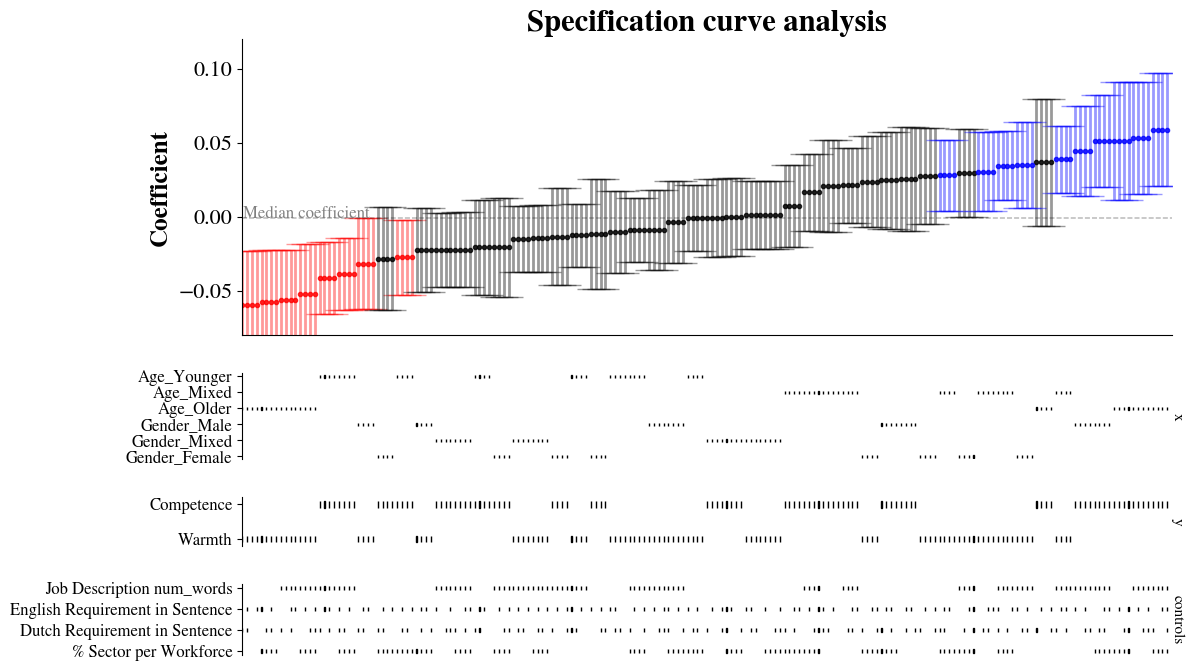

In [163]:
from setup_module import specification_curve_fork as specy # type:ignore # isort:skip # fmt:skip # noqa # nopep8

print(f'Running specification curve analysis with:\nDEPENDENT VARIABLES = {dvs}\nINDEPENDENT VARIABLES = {ivs_dummy}\nCONTROLS = {controls}')
sc = specy.SpecificationCurve(df=df_manual, y_endog=dvs, x_exog=ivs_dummy, controls=controls)
sc.fit(estimator=sm.OLS)
sc.plot(show_plot=True)


Running specification curve analysis with:
DEPENDENT VARIABLES = ['Warmth', 'Competence']
INDEPENDENT VARIABLES = ['Gender_Female_% per Sector', 'Gender_Male_% per Sector', 'Age_Older_% per Sector', 'Age_Younger_% per Sector']
CONTROLS = ['% Sector per Workforce', 'Job Description num_words', 'English Requirement in Sentence', 'Dutch Requirement in Sentence']
Optimization terminated successfully.
         Current function value: 0.561970
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561637
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532556
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561970
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561970
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532313
         Iterations 6
Optimization terminated su

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686994
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687497
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687497
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686994
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686994
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6
         Current function value: 0.687497
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6
         Current function value: 0.686994
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687500
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687500
         Iterations: 35
         Current function value: 0.687500
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6
         Current function value: 0.687500
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.687099
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638119
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.687531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.637842
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687099
  

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6
         Current function value: 0.687102
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687102
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6
         Current function value: 0.687102
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit complete


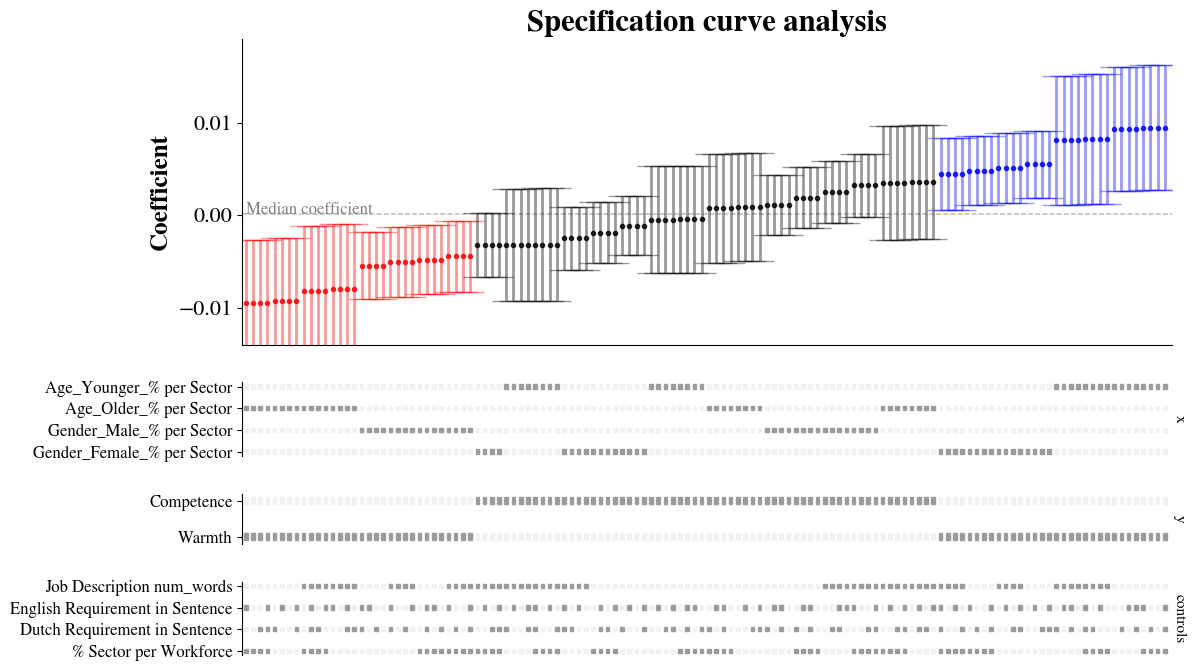

In [164]:
from setup_module import specification_curve_fork as specy # type:ignore # isort:skip # fmt:skip # noqa # nopep8

print(f'Running specification curve analysis with:\nDEPENDENT VARIABLES = {dvs}\nINDEPENDENT VARIABLES = {ivs_perc}\nCONTROLS = {controls}')
sc = specy.SpecificationCurve(df=df_manual, y_endog=dvs, x_exog=ivs_perc, controls=controls)
sc.fit(estimator=sm.Logit)
sc.plot(show_plot=True)


Running specification curve analysis with:
DEPENDENT VARIABLES = ['Warmth', 'Competence']
INDEPENDENT VARIABLES = ['Gender_Female_% per Sector', 'Gender_Male_% per Sector', 'Age_Older_% per Sector', 'Age_Younger_% per Sector', 'Gender_Female', 'Gender_Mixed', 'Gender_Male', 'Age_Older', 'Age_Mixed', 'Age_Younger']
CONTROLS = ['% Sector per Workforce', 'Job Description num_words', 'English Requirement in Sentence', 'Dutch Requirement in Sentence']
Optimization terminated successfully.
         Current function value: 0.561970
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561637
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532556
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561970
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561970
         Iterations 6
Optimization terminated successfully.
 

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686994
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687497
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687497
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686994
         Iterations: 35
         Current function value: 0.686994
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6
         Current function value: 0.687497
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686994
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638047
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637658
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687500
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6
         Current function value: 0.687500
         Iterations: 35
         Current function value: 0.687500
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6
         Current function value: 0.687500
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638051
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637664
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.687099
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638119
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.687531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.637842
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687099
  

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6
         Current function value: 0.687102
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687102
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.687535
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6
         Current function value: 0.687102
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638137
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.637856
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687439
         Iterations 9
         Current function value: 0.686896
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638173
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687439
         Iterations 9


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.687439
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.637824
         Iterations 6
         Current function value: 0.686896
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686896
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638173
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.638173
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.687439
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.637824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637824
         Iterations 6
         Current function value: 0.686896
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.638173
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637824
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687538
         Iterations: 35
         Current function value: 0.687104
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.637893
         Iterations 6
         Current function value: 0.687538
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687538
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637614
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687104
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687104
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637893
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637893
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687538
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637614
         Iterations 6
         Current function value: 0.687104
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.637893
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637614
         Iterations 6
         Current function value: 0.687443
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686920
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637382
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.687443
         Iterations: 35
         Current function value: 0.687443
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.636885
         Iterations 6
         Current function value: 0.686920
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686920
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637382
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.637382
         Iterations 6
         Current function value: 0.687443
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.636885
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.636885
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686920
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637382
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.636885
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.686575
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.637501
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.687135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.637082
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686575
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.686575
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.637501
  

/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.687054
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.637053
         Iterations 6
         Current function value: 0.686734
         Iterations: 35


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.686734
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687054
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.637053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637053
         Iterations 6
         Current function value: 0.686734
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.637208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637053
         Iterations 6


/opt/homebrew/Caskroom/mambaforge/base/envs/study1_3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit complete


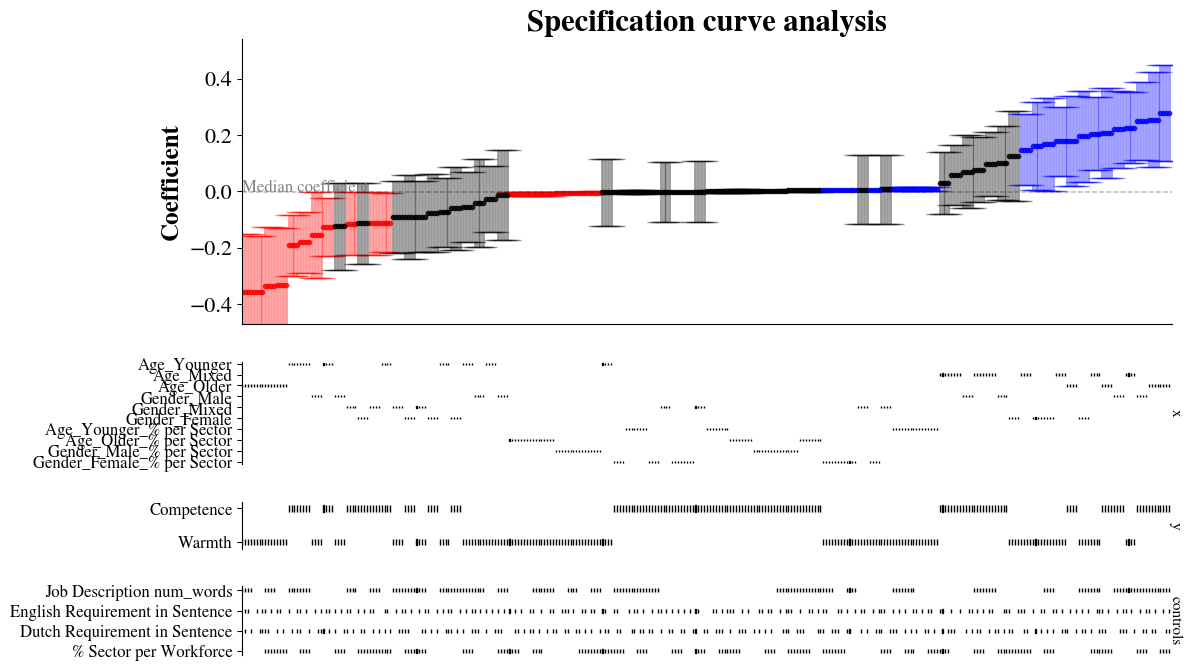

In [165]:
from setup_module import specification_curve_fork as specy # type:ignore # isort:skip # fmt:skip # noqa # nopep8

print(f'Running specification curve analysis with:\nDEPENDENT VARIABLES = {dvs}\nINDEPENDENT VARIABLES = {ivs_perc+ivs_dummy}\nCONTROLS = {controls}')
sc = specy.SpecificationCurve(df=df_manual, y_endog=dvs, x_exog=ivs_perc+ivs_dummy, controls=controls)
sc.fit(estimator=sm.Logit)
sc.plot(show_plot=True)


In [166]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim_bert.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim_bert.csv')


# ATTN: This script should be run AFTER all tokenization (spacy, nltk, gensim, and BERT) completed.


## Use spacy to create Parts-Of-Speech (POS) tags, lemmas, and stems


### START HERE IF SOURCING FROM df_manual_TOKENIZED_SPACY_NLTK_GENSIM_BERT
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [167]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [168]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [169]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_tokenized_spacy_nltk_gensim_bert.pkl')


In [170]:
## Warmth 1 = 1595 (24.90%), Competence 1 = 2836 (44.30%)
# get_df_info(df_manual, ivs_all=dvs)


In [171]:
# df_manual.info()


In [172]:
# %%time
# # Load customer characters
# with open(f'{data_dir}punctuations.txt', 'rb') as f:
#     custom_punct_chars = pickle.load(f)

# # POS tagging
# df_manual['Job Description spacy_token_tags'] = df_manual[
#     'Job Description spacy_sentencized'
# ].progress_apply(
#     lambda job_sentence: [
#         (token.text.strip().lower(), token.tag_) for token in nlp(job_sentence)
#     ]
# )

# # Lemmatization
# df_manual['Job Description spacy_lemmas'] = df_manual['Job Description spacy_sentencized'].progress_apply(
#     lambda job_sentence: [
#         token.lemma_.strip().lower()
#         for token in nlp(job_sentence)
#         if token.text is not None
#         and len(token.text) != 0
#         and token.text != '...'
#         and not token.is_space
#         and not token.is_stop
#         and not token.is_punct
#         and not token.is_quote
#         and token.is_ascii
#         and not token.is_bracket
#         and not token.like_email
#     ]
# )

# # Stemming
# df_manual['Job Description spacy_stems'] = df_manual['Job Description spacy_sentencized'].progress_apply(
#     lambda job_sentence: [
#         stemmer.stem(token.text.strip().lower())
#         for token in nlp(job_sentence)
#         if token.text is not None
#         and len(token) != 0
#         and len(token.text) != 0
#         and bool(token)
#         and bool(token.text)
#         and token.text != '...'
#         and not token.is_space
#         and not token.is_punct
#         and not token.is_quote
#         and not token.is_bracket
#         and not token.like_email
#     ]
# )

# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy.csv')


In [173]:
# df_manual.info()


In [174]:
# df_manual[
#     [
#         'Job Description spacy_token_tags',
#         'Job Description spacy_lemmas',
#         'Job Description spacy_stems'
#     ]
# ].head()


In [175]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy.csv')


## Use NLTK to create Parts-Of-Speech (POS) tags, lemmas, and stems


### START HERE IF SOURCING FROM df_manual_TAGS_LEMMAS_STEMS_SPACY
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [176]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [177]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [178]:
# def get_wordnet_pos(token):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag = nltk.pos_tag([token])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dict.get(tag, wordnet.NOUN)


In [179]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy.pkl')


In [180]:
# get_df_info(df_manual, ivs_all=dvs)


In [181]:
# df_manual.info()


In [182]:
# %%time
# # POS tagging
# df_manual['Job Description nltk_token_tags'] = df_manual['Job Description spacy_tokenized'].progress_apply(
#     lambda token: pos_tag(token)
# )

# # Lemmatization
# df_manual['Job Description nltk_lemmas'] = df_manual['Job Description spacy_tokenized'].progress_apply(
#     lambda tokens: [
#         lemmatizer.lemmatize(
#             token, get_wordnet_pos(
#                 unicodedata.normalize('NFKD', str(token.strip().lower())).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#             )
#         )
#         for token in tokens
#     ]
# )

# # Stemming
# df_manual['Job Description nltk_stems'] = df_manual['Job Description spacy_tokenized'].progress_apply(
#     lambda tokens: [
#         stemmer.stem(
#             unicodedata.normalize('NFKD', str(token.strip().lower())).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#         )
#         for token in tokens
#     ]
# )

# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk.csv')


In [183]:
# df_manual.info()


In [184]:
# df_manual[['Job Description nltk_token_tags', 'Job Description nltk_lemmas', 'Job Description nltk_stems']].head()


In [185]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk.csv')


## Use BERT to create Parts-Of-Speech (POS) tags, lemmas, and stems


### START HERE IF SOURCING FROM df_manual_TAGS_LEMMAS_STEMS_SPACY_NLTK
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [186]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [187]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [188]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk.pkl')


In [189]:
# get_df_info(df_manual, ivs_all=dvs)


In [190]:
# %%time
# bert_pos_model_name = 'QCRI/bert-base-multilingual-cased-pos-english'
# bert_pos_model = AutoModelForTokenClassification.from_pretrained(bert_pos_model_name).to(device)
# bert_pos_tagger = TokenClassificationPipeline(model=bert_pos_model, tokenizer=bert_tokenizer).to(device)

# df_manual['Job Description bert_token_tags_with_scores'] = df_manual['Job Description spacy_sentencized'].progress_apply(
#     lambda sentence: [
#         (bert_pos_tag['word'], bert_pos_tag['entity'], bert_pos_tag['score'])
#         for i in range(len(sentence.split()))
#         for bert_pos_tag in bert_pos_tagger(sentence)
#     ]
# )

# df_manual['Job Description bert_token_tags'] = df_manual['Job Description bert_token_tags_with_scores'].progress_apply(
#     lambda tag_list: [
#         [(tag_list[i][0], tag_list[i][1])]
#         for tag_tuple in tag_list
#         for i in range(len(tag_list))
#     ]
# )


# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk_bert.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk_bert.csv')


In [191]:
# df_manual['Job Description bert_token_tags'].head()

In [192]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk_bert.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk_bert.csv')


# ATTN: This script should be run AFTER all POS tagging, lemmatization, and stemming (spacy and nltk) completed. If BERT POS tagging was done, change pkl file loading


## Use spacy to create bi and trigrams


### START HERE IF SOURCING FROM df_manual_TAGS_LEMMAS_STEMS_SPACY_NLTK
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [193]:
# import os
# import sys
# import importlib
# from pathlib import Path
# import numpy as np

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [194]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [195]:
# def spacy_make_ngrams(sentence, matcher, gram_type):

#     doc = nlp(sentence)
#     matches = matcher(doc)
#     matches_list = []

#     for idx in range(len(matches)):
#         for match_id, start, end in matches:
#             if nlp.vocab.strings[match_id].split('_')[0] == gram_type:
#                 match = doc[matches[idx][1]: matches[idx][2]].text
#                 matches_list.append(match.lower())

#     return list(set(matches_list))


In [196]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_tags_lemmas_stems_spacy_nltk_bert.pkl')


In [197]:
# get_df_info(df_manual, ivs_all=dvs)


In [198]:
# %%time
# df_manual['Job Description spacy_1grams_original_list'] = df_manual['Job Description spacy_tokenized']
# df_manual['Job Description spacy_1grams'] = df_manual['Job Description spacy_tokenized'].progress_apply(
#     lambda tokens: [
#         tuple(token.split())
#         for token in tokens
#     ]
# )


In [199]:
# %%time
# # Spacy bi and trigrams
# matcher = Matcher(nlp.vocab)

# bigram_rules = [
#     ['NOUN', 'VERB'],
#     ['VERB', 'NOUN'],
#     ['ADJ', 'NOUN'],
#     ['ADJ', 'PROPN'],
#     # more rules here...
# ]

# trigram_rules = [
#     ['VERB', 'ADJ', 'NOUN'],
#     ['NOUN', 'VERB', 'ADV'],
#     ['NOUN', 'ADP', 'NOUN'],
#     # more rules here...
# ]

# patters_dict = {
#     'bigram_patterns': [[{'POS': i} for i in j] for j in bigram_rules],
#     'trigram_patterns': [[{'POS': i} for i in j] for j in trigram_rules],
# }

# ngram_dict = {
#     'bigram': 2,
#     'trigram': 3,
# }

# for ngram_name, ngram_num in tqdm.tqdm(ngram_dict.items()):

#     matcher.add(f'{ngram_name}_patterns', patters_dict[f'{ngram_name}_patterns'])

#     df_manual[f'Job Description spacy_{str(ngram_num)}grams_original_list'] = df_manual['Job Description spacy_sentencized'].progress_apply(
#         lambda sentence: 
#             [
#                 '_'.join(ngram_.split())
#                 for ngram_ in spacy_make_ngrams(sentence, matcher, ngram_name)
#             ]
#     )

#     df_manual[f'Job Description spacy_{str(ngram_num)}grams'] = df_manual['Job Description spacy_sentencized'].progress_apply(
#         lambda sentence: 
#             [
#                 tuple(ngram_.split())
#                 for ngram_ in spacy_make_ngrams(sentence, matcher, ngram_name)
#             ]
#     )

#     df_manual[f'Job Description spacy_{str(ngram_num)}grams_in_sent'] = df_manual['Job Description spacy_sentencized'].str.lower().replace(
#         regex = {
#             re.escape(' '.join(ngram_.split('_'))): re.escape(ngram_)
#             for ngrams_list in df_manual[f'Job Description spacy_{str(ngram_num)}grams_original_list']
#             for ngram_ in ngrams_list
#             if '_' in ngram_
#         }
#     )

#     if f'{ngram_name}_patterns' in matcher:
#         matcher.remove(f'{ngram_name}_patterns')
#     assert f'{ngram_name}_patterns' not in matcher


In [200]:
# %%time
# # Spacy Allgrams
# df_manual['Job Description spacy_123grams_original_list'] = df_manual['Job Description spacy_tokenized'] + df_manual['Job Description spacy_2grams_original_list'] + df_manual['Job Description spacy_3grams_original_list']
# df_manual['Job Description spacy_123grams'] = df_manual['Job Description spacy_1grams'] + df_manual['Job Description spacy_2grams'] + df_manual['Job Description spacy_3grams']
# df_manual['Job Description spacy_123grams_in_sent'] = (
#     df_manual['Job Description spacy_sentencized']
#     .str.lower()
#     .replace(
#         regex={
#             re.escape(' '.join(ngram_.split('_'))): re.escape(ngram_)
#             for ngrams_list in df_manual[
#                 'Job Description spacy_123grams_original_list'
#             ]
#             for ngram_ in ngrams_list
#             if '_' in ngram_
#         }
#     )
# )


In [201]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_ngrams_spacy.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_ngrams_spacy.csv')


## Use NLTK to create bi and trigrams


### START HERE IF SOURCING FROM df_manual_NGRAMS_SPACY
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [202]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [203]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [204]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_ngrams_spacy.pkl')


In [205]:
# get_df_info(df_manual, ivs_all=dvs)


In [206]:
# %%time
# df_manual['Job Description nltk_1grams_original_list'] = df_manual['Job Description nltk_tokenized']
# df_manual['Job Description nltk_1grams'] = df_manual['Job Description nltk_tokenized'].progress_apply(
#     lambda tokens: [
#         tuple(token.split())
#         for token in tokens
#     ]
# )


In [207]:
# %%time
# # NLTK bi and trigrams
# ngram_dict = {
#     'bigram': 2,
#     'trigram': 3
# }

# for ngram_name, ngram_num in tqdm.tqdm(ngram_dict.items()):

#     df_manual[f'Job Description nltk_{str(ngram_num)}grams_original_list'] = df_manual['Job Description nltk_tokenized'].progress_apply(
#         lambda tokens:
#             list(
#                 '_'.join(ngram_list)
#                 for ngram_list in nltk.ngrams(tokens, ngram_num)
#             )
#     )

#     df_manual[f'Job Description nltk_{str(ngram_num)}grams'] = df_manual['Job Description nltk_tokenized'].progress_apply(
#         lambda tokens: list(nltk.ngrams(tokens, ngram_num))
#     )

#     df_manual[f'Job Description nltk_{str(ngram_num)}grams_in_sent'] = df_manual['Job Description spacy_sentencized'].str.lower().replace(
#         regex = {
#             re.escape(' '.join(ngram_.split('_'))): re.escape(ngram_)
#             for ngrams_list in df_manual[f'Job Description nltk_{str(ngram_num)}grams_original_list']
#             for ngram_ in ngrams_list
#             if '_' in ngram_
#         }
#     )


In [208]:
# %%time
# # NLTK Allgrams
# df_manual['Job Description nltk_123grams_original_list'] = (
#     df_manual['Job Description nltk_tokenized']
#     + df_manual['Job Description nltk_2grams_original_list']
#     + df_manual['Job Description nltk_3grams_original_list']
# )
# df_manual['Job Description nltk_123grams'] = (
#     df_manual['Job Description nltk_1grams']
#     + df_manual['Job Description nltk_2grams']
#     + df_manual['Job Description nltk_3grams']
# )
# df_manual['Job Description nltk_123grams_in_sent'] = (
#     df_manual['Job Description spacy_sentencized']
#     .str.lower()
#     .replace(
#         regex={
#             re.escape(' '.join(ngram_.split('_'))): re.escape(ngram_)
#             for ngrams_list in df_manual[
#                 'Job Description nltk_123grams_original_list'
#             ]
#             for ngram_ in ngrams_list
#             if '_' in ngram_
#         }
#     )
# )


In [209]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_ngrams_spacy_nltk.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_ngrams_spacy_nltk.csv')


## Use Gensim to create bi and trigrams


### START HERE IF SOURCING FROM df_manual_NGRAMS_SPACY_NLTK
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [210]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [211]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [212]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_ngrams_spacy_nltk.pkl')


In [213]:
# get_df_info(df_manual, ivs_all=dvs)


In [214]:
# df_manual['Job Description gensim_1grams_original_list'] = df_manual['Job Description gensim_tokenized']
# df_manual['Job Description gensim_1grams'] = df_manual['Job Description gensim_tokenized'].progress_apply(
#     lambda tokens: [
#         tuple(token.split())
#         for token in tokens
#     ]
# )


In [215]:
# %%time
# # Gensim bi and trigrams
# # Gensim Bigrams
# bigram = Phraser(Phrases(df_manual['Job Description gensim_tokenized'], connector_words=ENGLISH_CONNECTOR_WORDS, min_count=1, threshold=1))
# df_manual['Job Description gensim_2grams_original_list_all'] = bigram[df_manual['Job Description gensim_tokenized']]
# df_manual['Job Description gensim_2grams_original_list'] = df_manual['Job Description gensim_2grams_original_list_all'].progress_apply(
#     lambda ngrams_list: [
#         ngram_
#         for ngram_ in ngrams_list
#         if len(re.findall('[a-zA-Z]*\_[a-zA-Z]*', ngram_)) != 0
#     ]
# )
# df_manual['Job Description gensim_2grams'] = df_manual['Job Description gensim_2grams_original_list'].progress_apply(
#     lambda ngrams: [
#         tuple(ngram.split('_'))
#         for ngram in ngrams
#         if '_' in ngram
#     ]
# )
# df_manual['Job Description gensim_2grams_in_sent'] = (
#     df_manual['Job Description spacy_sentencized']
#     .str.lower()
#     .progress_apply(
#         lambda sentence: ' '.join(
#             preprocess_string(re.sub(pattern, ' ', sentence.strip().lower()))
#         )
#     )
#     .replace(
#         regex={
#             re.escape(' '.join(ngram_.split('_'))): re.escape(ngram_)
#             for ngrams_list in df_manual[
#                 'Job Description gensim_2grams_original_list'
#             ]
#             for ngram_ in ngrams_list
#             if '_' in ngram_
#         }
#     )
# )

# # Gensim Trigrams
# trigram = Phraser(Phrases(df_manual['Job Description gensim_2grams_original_list_all'], connector_words=ENGLISH_CONNECTOR_WORDS, min_count=1, threshold=1))
# df_manual['Job Description gensim_3grams_original_list_all'] = trigram[df_manual['Job Description gensim_2grams_original_list_all']]
# df_manual['Job Description gensim_3grams_original_list'] = df_manual['Job Description gensim_3grams_original_list_all'].progress_apply(
#     lambda ngrams_list: [
#         ngram_
#         for ngram_ in ngrams_list
#         if len(re.findall('[a-zA-Z]*\_[a-zA-Z]*\_[a-zA-Z]*', ngram_)) != 0
#     ]
# )
# df_manual['Job Description gensim_3grams'] = df_manual['Job Description gensim_3grams_original_list'].progress_apply(
#     lambda ngrams: [
#         tuple(ngram.split('_'))
#         for ngram in ngrams
#         if '_' in ngram
#     ]
# )
# df_manual['Job Description gensim_3grams_in_sent'] = (
#     df_manual['Job Description spacy_sentencized']
#     .str.lower()
#     .progress_apply(
#         lambda sentence: ' '.join(
#             preprocess_string(re.sub(pattern, ' ', sentence.strip().lower()))
#         )
#     )
#     .replace(
#         regex={
#             re.escape(' '.join(ngram_.split('_'))): re.escape(ngram_)
#             for ngrams_list in df_manual[
#                 'Job Description gensim_3grams_original_list'
#             ]
#             for ngram_ in ngrams_list
#             if '_' in ngram_
#         }
#     )
# )


In [216]:
# %%time
# # Gensim Allgrams
# pattern = r'[\n]+|[,]{2,}|[|]{2,}|[\n\r]+|(?<=[a-z]\.)(?=\s*[A-Z])|(?=\:+[A-Z])'

# df_manual['Job Description gensim_123grams_original_list'] = (
#     df_manual['Job Description gensim_tokenized']
#     + df_manual['Job Description gensim_2grams_original_list']
#     + df_manual['Job Description gensim_3grams_original_list']
# )
# df_manual['Job Description gensim_123grams'] = (
#     df_manual['Job Description gensim_1grams']
#     + df_manual['Job Description gensim_2grams']
#     + df_manual['Job Description gensim_3grams']
# )
# df_manual['Job Description gensim_123grams_in_sent'] = (
#     df_manual['Job Description spacy_sentencized']
#     .str.lower()
#     .progress_apply(
#         lambda sentence: ' '.join(
#             preprocess_string(re.sub(pattern, ' ', sentence.strip().lower()))
#         )
#     )
#     .replace(
#         regex={
#             re.escape(' '.join(ngram_.split('_'))): re.escape(ngram_)
#             for ngrams_list in df_manual[
#                 'Job Description gensim_123grams_original_list'
#             ]
#             for ngram_ in ngrams_list
#             if '_' in ngram_
#         }
#     )
# )


In [217]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_ngrams_spacy_nltk_gensim.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_ngrams_spacy_nltk_gensim.csv')


## Create word frequencies for uni, bi, and trigrams


### START HERE IF SOURCING FROM df_manual_NGRAMS_SPACY_NLTK_GENSIM
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [218]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [219]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [220]:
# def get_abs_frequency(row, text_col, ngram_num, embedding_library):

#     abs_word_freq = defaultdict(int)
#     for word in row[f'Job Description {embedding_library}_{ngram_num}grams_original_list']:
#         abs_word_freq[word] += 1

#         abs_wtd_df = (
#             pd.DataFrame.from_dict(abs_word_freq, orient='index')
#             .rename(columns={0: 'abs_word_freq'})
#             .sort_values(by=['abs_word_freq'], ascending=False)
#             )
#         abs_wtd_df.insert(1, 'abs_word_perc', value=abs_wtd_df['abs_word_freq'] / abs_wtd_df['abs_word_freq'].sum())
#         abs_wtd_df.insert(2, 'abs_word_perc_cum', abs_wtd_df['abs_word_perc'].cumsum())

#         row[f'Job Description {embedding_library}_{ngram_num}grams_abs_word_freq'] = str(abs_wtd_df['abs_word_freq'].to_dict())
#         row[f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc'] = str(abs_wtd_df['abs_word_perc'].to_dict())
#         row[f'Job Description {embedding_library}_{ngram_num}grams_abs_word_perc_cum'] = str(abs_wtd_df['abs_word_perc_cum'].to_dict())

#     return row


In [221]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_ngrams_spacy_nltk_gensim.pkl')


In [222]:
# get_df_info(df_manual, ivs_all=dvs)


In [223]:
# %%time
# ngrams_list=[1, 2, 3, 123]
# embedding_libraries_list = ['spacy', 'nltk', 'gensim']

# for embedding_library, ngram_num in tqdm_product(embedding_libraries_list, ngrams_list):
#     df_manual[f'Job Description {embedding_library}_{ngram_num}grams_count'] = df_manual[f'Job Description {embedding_library}_{ngram_num}grams'].apply(lambda x: len(x))
#     df_manual = df_manual.progress_apply(lambda row: get_abs_frequency(row=row, text_col='Job Description spacy_tokenized', ngram_num=ngram_num, embedding_library=embedding_library), axis='columns')


In [224]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_ngrams_frequency.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_ngrams_frequency.csv')


## Create BoW dictionary, corpus, and tfidf matrix for uni, bi, and trigrams


### START HERE IF SOURCING FROM df_manual_NGRAMS_FREQUENCY
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [225]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [226]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [227]:
# def get_corpus_and_dictionary(row, ngram_num, embedding_library):

#     ngrams_original_list = row[f'Job Description {embedding_library}_{ngram_num}grams_original_list']
#     dictionary = Dictionary([ngrams_original_list])
#     BoW_corpus = [dictionary.doc2bow(ngrams_original_list)]
#     tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
#     tfidf_matrix = [tfidf[doc] for doc in BoW_corpus]

#     row[f'Job Description {embedding_library}_{ngram_num}grams_dictionary'] = dictionary
#     row[f'Job Description {embedding_library}_{ngram_num}grams_BoW_corpus'] = BoW_corpus
#     row[f'Job Description {embedding_library}_{ngram_num}grams_tfidf'] = tfidf
#     row[f'Job Description {embedding_library}_{ngram_num}grams_tfidf_matrix'] = tfidf_matrix

#     return row


In [228]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_ngrams_frequency.pkl')


In [229]:
# get_df_info(df_manual, ivs_all=dvs)


In [230]:
# %%time
# ngrams_list=[1, 2, 3, 123]
# embedding_libraries_list = ['spacy', 'nltk', 'gensim']
# for embedding_library, ngram_num in tqdm_product(embedding_libraries_list, ngrams_list):
#     df_manual = df_manual.progress_apply(
#         lambda row: get_corpus_and_dictionary(
#             row=row, ngram_num=ngram_num, embedding_library=embedding_library
#         ),
#         axis='columns'
#     )

# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_ngrams_frequency.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_ngrams_BoW.csv')


In [231]:
# df_manual.columns


In [232]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_ngrams_BoW.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_ngrams_BoW.csv')


# ATTN: This script should be run AFTER all bi and trigrams (spacy, nltk, and gensim) completed.



## Use spacy and nltk for sentiment scoring


### START HERE IF SOURCING FROM df_manual_NGRAMS_BOW
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [233]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [234]:
# from setup_module.imports import * # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [235]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_ngrams_BoW.pkl')


In [236]:
# get_df_info(df_manual, ivs_all=dvs)


In [237]:
# %%time
# # Spacy sentiment
# if 'spacytextblob' not in nlp.pipe_names:
#     nlp.add_pipe('spacytextblob')

# df_manual['Job Description spacy_sentiment'] = df_manual['Job Description spacy_sentencized'].progress_apply(
#     lambda sentence: float(nlp(sentence)._.blob.polarity)
#     if isinstance(sentence, str) else np.nan
# )


In [238]:
# %%time
# # NLTK sentiment
# df_manual['Job Description nltk_sentiment'] = df_manual['Job Description spacy_sentencized'].progress_apply(
#     lambda sentence: float(sentim_analyzer.polarity_scores(sentence)['compound'])
#     if isinstance(sentence, str) else np.nan
# )


In [239]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_sentiment_spacy_nltk.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_sentiment_spacy_nltk.csv')


# ATTN: This script should be run AFTER all sentiment scoring (spacy and nltk) completed.


## Word2Vec and FastText embeddings


### START HERE IF SOURCING FROM df_manual_SENTIMENT_SPACY_NLTK
### PLEASE SET CORRECT DIRECTORY PATHS BELOW


In [240]:
# import os # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# import sys # type:ignore # isort:skip # fmt:skip # noqa # nopep8
# from pathlib import Path # type:ignore # isort:skip # fmt:skip # noqa # nopep8

# mod = sys.modules[__name__]

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# sys.path.append(code_dir)
# # %load_ext autoreload
# # %autoreload 2


In [241]:
# from setup_module.imports import *  # type:ignore # isort:skip # fmt:skip # noqa # nopep8


In [242]:
# def build_train_word2vec(df, ngram_number, embedding_library, size = 300, words=None, t = time.time(), cores = multiprocessing.cpu_count()):
#     if words is None:
#         words = [
#             'she',
#             'he',
#             'support',
#             'leader',
#             'management',
#             'team',
#             'business',
#             'customer',
#             'risk',
#             'build',
#             'computer',
#             'programmer',
#         ]
#     sentences = df[f'Job Description {embedding_library}_{ngram_number}grams_original_list'].values

#     w2v_model = Word2Vec(
#         sentences=sentences,
#         vector_size=size,
#         min_count=0,
#         window=2,
#         sample=6e-5,
#         alpha=0.03,
#         min_alpha=0.0007,
#         negative=20,
#         workers=cores - 1,
#         sg = 1,
#     )

#     w2v_model.build_vocab(sentences, progress_per=10000)
#     print(f'Time to train the model for {size}: {round((time.time() - t) / 60, 2)} mins')

#     w2v_model.train(
#         sentences,
#         total_examples=w2v_model.corpus_count,
#         epochs=30,
#         report_delay=1,
#     )

#     print(f'Time to build w2v_vocab for {size}: {round((time.time() - t) / 60, 2)} mins')
#     w2v_vocab = list(w2v_model.wv.index_to_key)

#     print(f'Checking words form list of length {len(words)}')
#     print(f'WORDS LIST: {words}')

# #     for word in words:
# #         print(f'Checking word:\n{word.upper()}:')
# #         try:
# # #             print(f'Word2Vec {size}: {w2v_model.wv[word]}')
# #             print(f'Length of {size} model vobal: {len(w2v_vocab)}')
# #             print(f'{size} - Positive most similar to {word}: {w2v_model.wv.most_similar(positive=word, topn=5)}')
# #             print(f'{size} - Negative most similar to {word}: {w2v_model.wv.most_similar(negative=word, topn=5)}')

# #         except KeyError as e:
# #             print(e)

#     return w2v_vocab, w2v_model

# def word2vec_embeddings(sentences, w2v_vocab, w2v_model, size=300):

#     sentences = [word for word in sentences if word in w2v_vocab]

#     return (
#         np.mean(w2v_model.wv[sentences], axis=0)
#         if sentences
#         else np.zeros(size)
#     )



In [243]:
# def build_train_fasttext(df, ngram_number, embedding_library, size = 300, words=None, t = time.time(), cores = multiprocessing.cpu_count()):
#     if words is None:
#         words = [
#             'she',
#             'he',
#             'support',
#             'leader',
#             'management',
#             'team',
#             'business',
#             'customer',
#             'risk',
#             'build',
#             'computer',
#             'programmer',
#         ]
#     sentences = df[f'Job Description {embedding_library}_{ngram_number}grams_original_list'].values

#     ft_model = FastText(
#         sentences=sentences,
#         vector_size=size,
#         min_count=0,
#         window=2,
#         sample=6e-5,
#         alpha=0.03,
#         min_alpha=0.0007,
#         negative=20,
#         workers=cores - 1,
#         sg = 1,
#     )

#     ft_model.build_vocab(sentences, progress_per=10000)
#     print(f'Time to train the model for {size}: {round((time.time() - t) / 60, 2)} mins')

#     ft_model.train(
#         sentences,
#         total_examples=ft_model.corpus_count,
#         epochs=30,
#         report_delay=1,
#     )

#     print(f'Time to build vocab for {size}: {round((time.time() - t) / 60, 2)} mins')
#     ft_vocab = list(ft_model.wv.index_to_key)

#     print(f'Checking words form list of length {len(words)}')
#     print(f'WORDS LIST: {words}')

# #     for word in words:
# #         print(f'Checking word:\n{word.upper()}:')
# #         try:
# # #             print(f'FastText {size}: {ft_model_300.wv[word]}')
# #             print(f'Length of {size} model vobal: {len(ft_vocab)}')
# #             print(f'{size} - Positive most similar to {word}: {ft_model.wv.most_similar(positive=word, topn=5)}')
# #             print(f'{size} - Negative most similar to {word}: {ft_model.wv.most_similar(negative=word, topn=5)}')

# #         except KeyError as e:
# #             print(e)

#     return ft_vocab, ft_model

# def fasttext_embeddings(sentences, ft_vocab, ft_model, size=300):

#     sentences = [word for word in sentences if word in ft_vocab]

#     return np.mean(ft_model.wv[sentences], axis=0) if sentences else np.zeros(size)


In [244]:
# def get_glove(glove_file = f'{llm_path}/gensim/glove/glove.840B.300d.txt'):
#     embeddings_index = {}
#     with open(glove_file, 'r', encoding='utf8') as glove:

#         for line in glove:
#             values = line.split()
#             word = values[0]

#             with contextlib.suppress(ValueError):
#                 coefs = np.asarray(values[1:], dtype='float32')
#                 embeddings_index[word] = coefs
#     print(f'Found {len(embeddings_index)} word vectors.')

#     return embeddings_index


In [245]:
# def sent2vec(sentences, embeddings_index=None, external_glove=True, extra_preprocessing_enabled=False):

#     if external_glove is False and embeddings_index is None:
#         embeddings_index= get_glove()

#     if extra_preprocessing_enabled is False:
#         words = sentences

#     elif extra_preprocessing_enabled is True:
#         stop_words = set(sw.words('english'))
#         words = str(sentences).lower()
#         words = word_tokenize(words)
#         words = [w for w in words if (w not in stop_words) and (w.isalpha())]

#     M = []

#     try:
#         for w in words:
#             try:
#                 M.append(embeddings_index[w])
#             except Exception:
#                 continue

#         M = np.array(M)
#         v = M.sum(axis='index')
#         return np.zeros(300) if type(v) != np.ndarray else v / np.sqrt((v ** 2).sum())

#     except Exception:
#         return np.zeros(300)


In [246]:
# df_manual = pd.read_pickle(f'{df_save_dir}df_manual_sentiment_spacy_nltk.pkl')


In [247]:
# get_df_info(df_manual, ivs_all=dvs)


In [248]:
# embedding_models_dict = {
#     'w2v': [build_train_word2vec, word2vec_embeddings, Word2Vec],
#     'ft': [build_train_fasttext, fasttext_embeddings, FastText],
# }


In [249]:
# %%time
# # Make embeddings
# ngrams_list=[1, 2, 3, 123]
# embedding_libraries_list = ['spacy', 'nltk', 'gensim']

# for embedding_library, ngram_number in tqdm_product(embedding_libraries_list, ngrams_list):
#     print(f'Building {embedding_library}_{ngram_number}grams model and vocabulary.')

#     for embed_model_name, embed_func_list in tqdm.tqdm(embedding_models_dict.items()):

#         build_train_func, embed_func, model_loader = embed_func_list
#         print(f'Building {embed_model_name} from {embed_func.__name__} function.')

#         vocab, model = build_train_func(
#             df=df_manual,
#             ngram_number=ngram_number,
#             embedding_library=embedding_library,
#         )

#         print(f'Getting {embed_model_name} embeddings.')

#         df_manual[
#             f'Job Description {embedding_library}_{ngram_number}grams_mean_{embed_model_name}_embeddings'
#         ] = df_manual[
#             f'Job Description {embedding_library}_{ngram_number}grams_original_list'
#         ].progress_apply(
#             lambda sentences: embed_func(sentences, vocab, model)
#         )
#         model.save(f'{data_dir}embeddings models/{embedding_library}_{ngram_number}grams_{embed_model_name}_model.model')

#     # Sent2Vec
#     print('Getting sent2vec embeddings.')
#     embeddings_index = get_glove()
#     df_manual[f'Job Description {embedding_library}_{ngram_number}grams_sent2vec_embeddings'] = df_manual[f'Job Description {embedding_library}_{ngram_number}grams'].progress_apply(lambda sentences: sent2vec(sentences, embeddings_index=embeddings_index, external_glove=True, extra_preprocessing_enabled=False))
#     print('Done getting sent2vec embeddings.')


In [250]:
# assert len(df_manual) > 0 and isinstance(df_manual, pd.DataFrame), f'ERORR: LENGTH OF DF = {len(df_manual)}'
# df_manual.to_pickle(f'{df_save_dir}df_manual_for_trainning.pkl')
# df_manual.to_csv(f'{df_save_dir}df_manual_for_trainning.csv')


In [251]:
# print(f'Saving df_manual length {len(df_manual)} to txt file.')
# with open(f'{data_dir}df_manual_len.txt', 'w') as f:
#     f.write(str(len(df_manual)))
